# How well do jobs and skills pay for Data Analysts?

## Methology

   1. Evaluate median salary for top 6 data jobs
   2. Find median salary per skill for Data Analysts
   3. Visualize for highest paying skills and most demanded skills


In [34]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns


# Load Data
df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [35]:
# Drop NaN values from the "salary_year_avg" column for accurate visualization
df_US = df[df.job_country == "United States"].dropna(subset=["salary_year_avg"])

In [36]:
# Get top 6 job title by the job postings
job_titles = df_US.job_title_short.value_counts().index[:6].tolist()

In [37]:
# To use groupby change the type from list to dataframe
df_US_top6 = df_US[df_US.job_title_short.isin(job_titles)]
type(df_US_top6)

pandas.core.frame.DataFrame

In [38]:
# Get top 6 most paid job titles
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

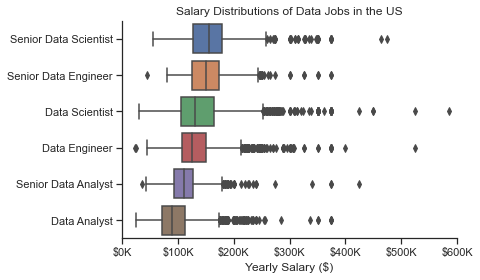

In [39]:
sns.boxplot(data=df_US_top6, x="salary_year_avg", y="job_title_short", order=job_order)
sns.set_theme(style="ticks")
sns.despine()


plt.title("Salary Distributions of Data Jobs in the US")
plt.xlabel("Yearly Salary ($)")
plt.ylabel("")
plt.xlim(0, 600_000) 

# Format x axis
ticks_x = plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K")
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [40]:
# Now, investigate the median salary vs skill for Data Analysts

# Only get data analyst jobs in the US
df_DA_US = df[(df.job_title_short == "Data Analyst") & (df.job_country == "United States")].copy()

# Drop NaN values from the "salary_year_avg" column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

# Explode job_skills column to analyze and group them
df_DA_US = df_DA_US.explode("job_skills")

# double check if exploded
df_DA_US[["salary_year_avg", "job_skills"]].head()

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [41]:
# Get the most paid jobs by the salary
df_DA_US_top_pay = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="median", ascending=False).head(10)
df_DA_US_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [42]:
# Get the top 10 skills by the job skills
df_DA_US_top_wanted = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False).head(10)

# Sort the top 10 by median
df_DA_US_top_wanted = df_DA_US_top_wanted.sort_values(by="median", ascending=False)
df_DA_US_top_wanted

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


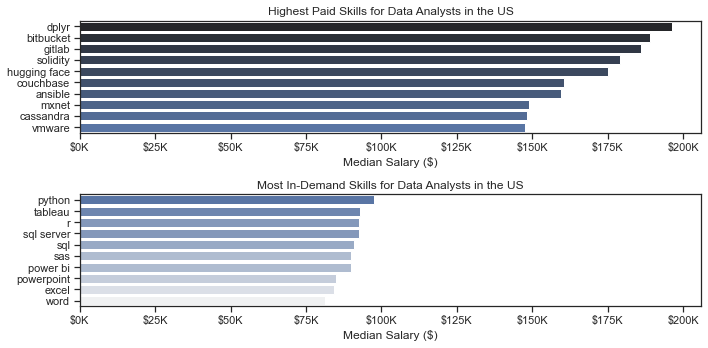

In [44]:
# Multiple charts at the same time
fig, ax = plt.subplots(2, 1, figsize=(10,5))  


# Top 10 Highest Paid Skills for Data Analysts

sns.barplot(data=df_DA_US_top_pay, x="median", y=df_DA_US_top_pay.index, hue="median", dodge=False, ax=ax[0], palette="dark:b_r")
ax[0].legend().remove()
# df_DA_US_top_pay[::-1].plot(kind="barh", y="median", ax=ax[0], legend=False) 
ax[0].set_title("Highest Paid Skills for Data Analysts in the US")
ax[0].set_ylabel("")
ax[0].set_xlabel("Median Salary ($)")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))


# Top 10 Most In-Demand Skills for Data Analysts

sns.barplot(data=df_DA_US_top_wanted, x="median", y=df_DA_US_top_wanted.index, hue="median", dodge=False, ax=ax[1], palette="light:b")
ax[1].legend().remove()
# df_DA_US_top_wanted[::-1].plot(kind="barh", y="median", ax=ax[1], legend=False)
ax[1].set_title("Most In-Demand Skills for Data Analysts in the US")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ($)")
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

sns.set_theme(style="ticks")
plt.tight_layout()
plt.show()